<a href="https://colab.research.google.com/github/Cole-Pd/DeepDive/blob/main/Project_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictions of Home Sale Price by Multivariate Regression

## Problem Definition


We have been tasked to build a ‘Home Sale Price’ predictive model. Since we have known sales data our approach is supervised. We chose to apply various linear regression models to our data set. We will use RSMPE as the metric to describe how well our model performs, where achieving the lowest possible RSMPE is our goal.

## Data Collection/Sources


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


## Data Cleaning


Our dataset contains ~2500 homes sold over a five year period. It’s corresponding data dictionary describes 81. The variables span continuous, categorical, ordinal, and nominal data types.

Text(0.5, 1.0, 'Number of Homes Sold by Year')

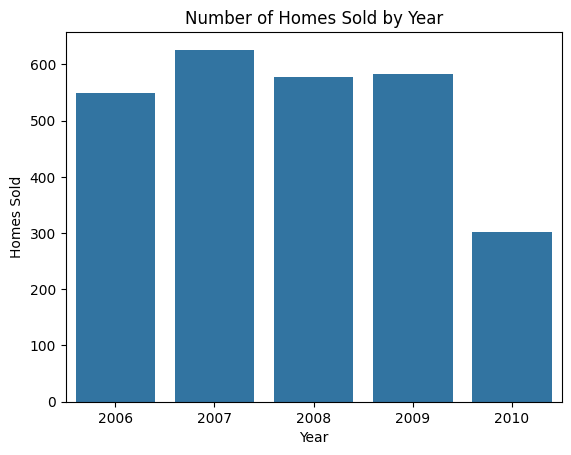

In [ ]:
sns.barplot(df['Yr Sold'].value_counts())
plt.xlabel('Year')
plt.ylabel('Homes Sold')
plt.title('Number of Homes Sold by Year')

For our analysis we have started by selecting only the ‘non-object data types’. This filters our data set to mostly continuous variables. It means that we will not use most of the nominal, ordinal, or categorical variables.

In [ ]:
df.select_dtypes(["float64",'int64']).columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [ ]:
non_obj_vars = ['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

In [ ]:
housing_ns = df[non_obj_vars].copy()

In [ ]:
housing_ns.isnull().sum() # These variables have many null variables.
housing_ns.drop(['Mas Vnr Area','Garage Yr Blt'], axis = 1, inplace = True)

In [ ]:
housing_ns.eq(0).mean()*100

PID                 0.000000
MS SubClass         0.000000
Lot Frontage        0.000000
Lot Area            0.000000
Overall Qual        0.000000
Overall Cond        0.000000
Year Built          0.000000
Year Remod/Add      0.000000
BsmtFin SF 1       31.854380
BsmtFin SF 2       87.864998
Bsmt Unf SF         8.304892
Total Bsmt SF       2.730375
1st Flr SF          0.000000
2nd Flr SF         57.072431
Low Qual Fin SF    98.672734
Gr Liv Area         0.000000
Bsmt Full Bath     58.172165
Bsmt Half Bath     94.160030
Full Bath           0.417141
Half Bath          62.305650
Bedroom AbvGr       0.227531
Kitchen AbvGr       0.075844
TotRms AbvGrd       0.000000
Fireplaces         48.691695
Garage Cars         5.498673
Garage Area         5.498673
Wood Deck SF       51.952977
Open Porch SF      44.254835
Enclosed Porch     84.148654
3Ssn Porch         98.786500
Screen Porch       91.391733
Pool Area          99.582859
Misc Val           96.435343
Mo Sold             0.000000
Yr Sold       

In [ ]:
housing_ns.drop([ # These variables have an abundance of zero values that do not help us either
'BsmtFin SF 1',
'BsmtFin SF 2',
'2nd Flr SF',
'Low Qual Fin SF',
'Bsmt Full Bath',
'Half Bath',
'Fireplaces',
'Wood Deck SF',
'Open Porch SF',
'Enclosed Porch',
'3Ssn Porch',
'Screen Porch',
'Misc Val',], axis = 1, inplace = True)

In [ ]:
housing_ns['SalePrice'] # Our target in our dataset invalidates results.
house_ns = housing_ns.drop(['SalePrice'], axis = 1).astype(float).copy()

In [ ]:
house_ns.isnull().sum()

PID                 0
MS SubClass         0
Lot Frontage      449
Lot Area            0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Bsmt Unf SF         1
Total Bsmt SF       1
1st Flr SF          0
Gr Liv Area         0
Bsmt Half Bath      2
Full Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Garage Cars         1
Garage Area         1
Pool Area           0
Mo Sold             0
Yr Sold             0
dtype: int64

In [ ]:
# Many of our variables have null values.
# We will replace them with their mean.
house_ns['Lot Frontage'].fillna(house_ns['Lot Frontage'].mean(), inplace = True)
house_ns['Lot Area'].fillna(house_ns['Lot Area'].mean(), inplace = True)
house_ns['Bsmt Unf SF'].fillna(house_ns['Bsmt Unf SF'].mean(), inplace = True)
house_ns['Total Bsmt SF'].fillna(house_ns['Total Bsmt SF'].mean(), inplace = True)
house_ns['Bsmt Half Bath'].fillna(house_ns['Bsmt Half Bath'].mean(), inplace = True)
house_ns['Garage Cars'].fillna(house_ns['Garage Cars'].mean(), inplace = True)
house_ns['Garage Area'].fillna(house_ns['Garage Area'].mean(), inplace = True)

## Exploratory Data Analysis


Of the remaining variables we only want variables that are correlated to our target, but not entirely correlated with our data. We chose to select the threshold of all values greater than 20% correlation will be further explored.
However, after optimizing our feature selection, we found better results by running the mostly normally distributed variables, regardless of their correlation.

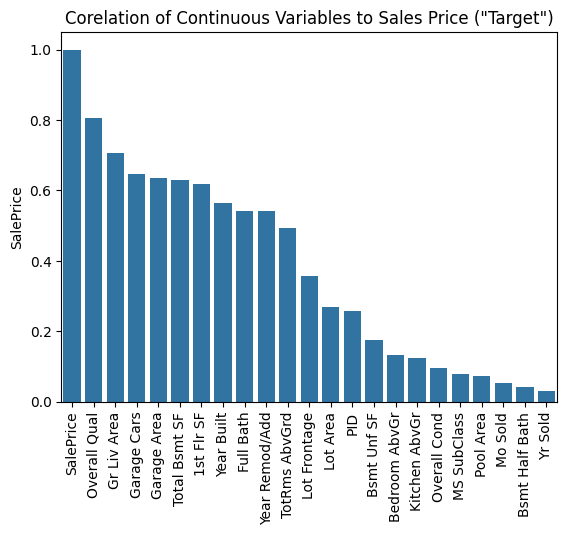

In [ ]:
ns_corr = housing_ns.corr()['SalePrice'].abs().sort_values(ascending = False)
sns.barplot(ns_corr)
plt.title('Corelation of Continuous Variables to Sales Price ("Target")') ;
plt.xticks(rotation ='vertical') ;

In [ ]:
houseing_clean = ns_corr[(ns_corr > .2) & (ns_corr < 1)]
houseing_clean.index

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'TotRms AbvGrd', 'Lot Frontage', 'Lot Area', 'PID'],
      dtype='object')

In [ ]:
# Here are the highly corelated columns from our data frame.
# I did not end up using them! I found running just these had a lower RSMPE
# than running the non-object varaibles.

#ns_chosen = [
             #'Overall Qual',
             #'Gr Liv Area',
             #'Garage Cars',
             #'Garage Area',
             #'Total Bsmt SF',
             #'1st Flr SF',
             #'Year Built',
             #'Full Bath',
             #'Year Remod/Add',
             #'TotRms AbvGrd',
             #'Lot Frontage',
             #'Lot Area',
             #'PID'
             #]

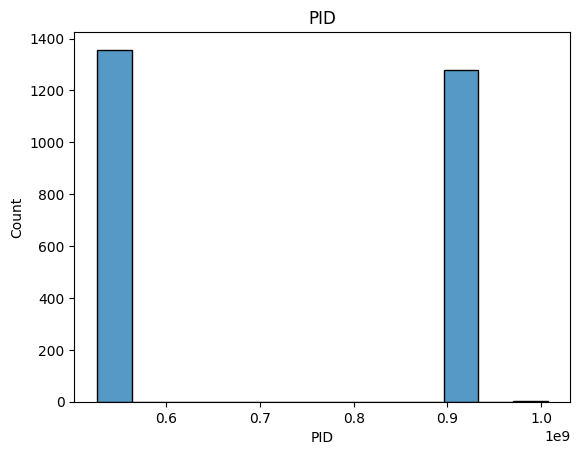

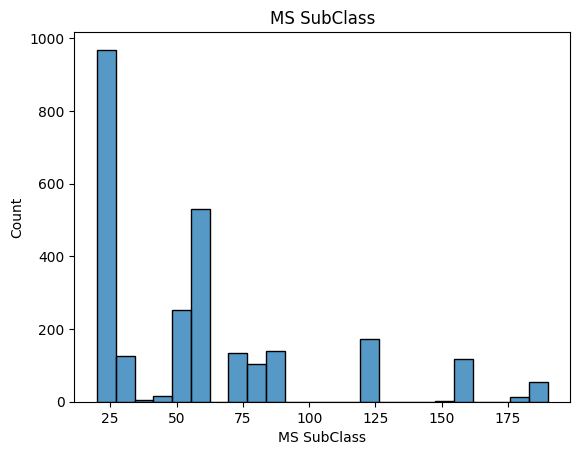

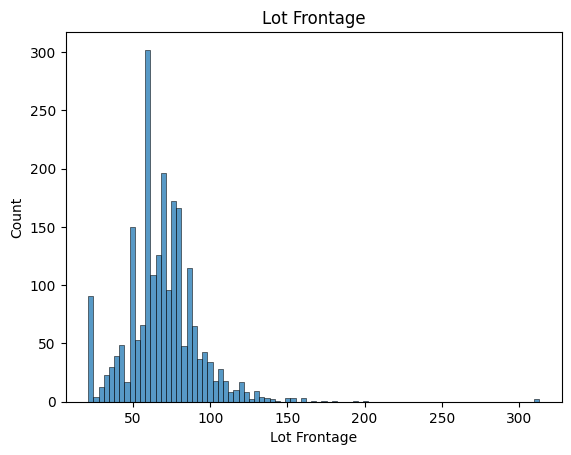

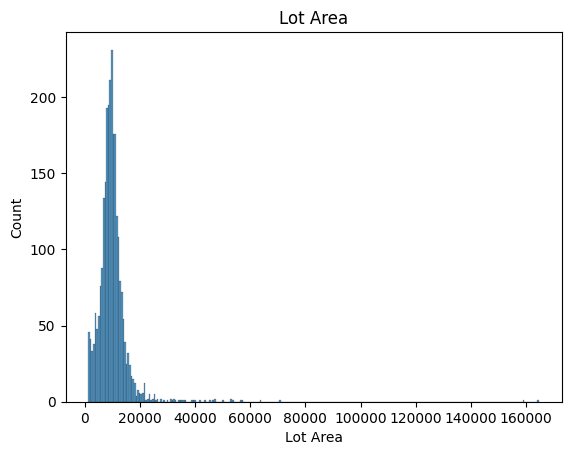

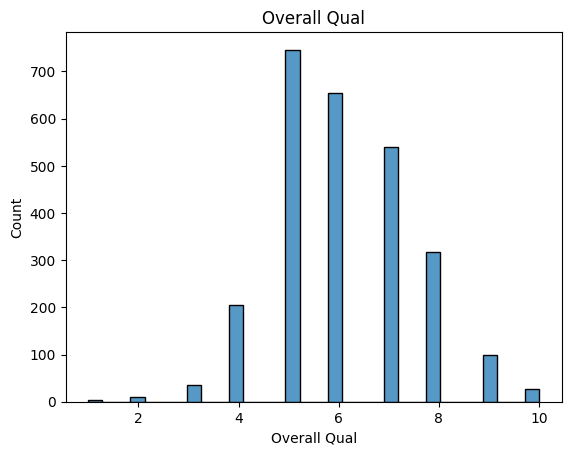

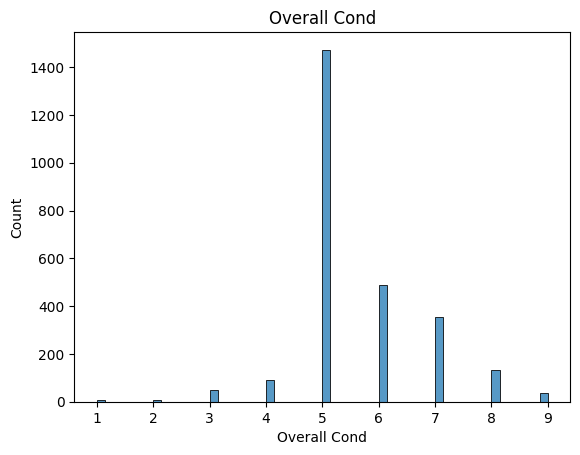

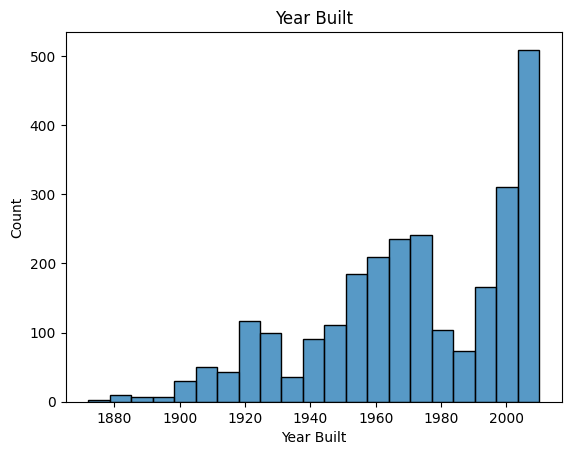

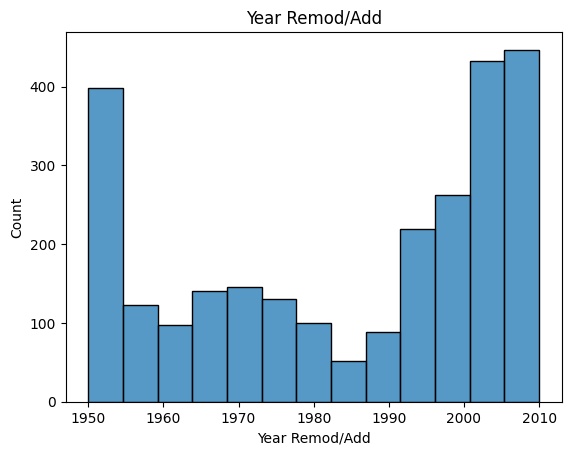

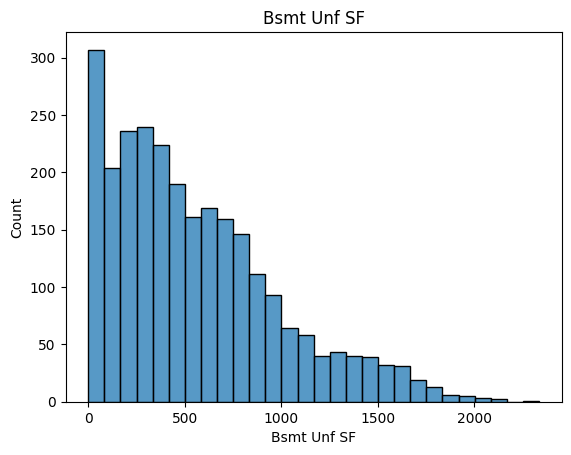

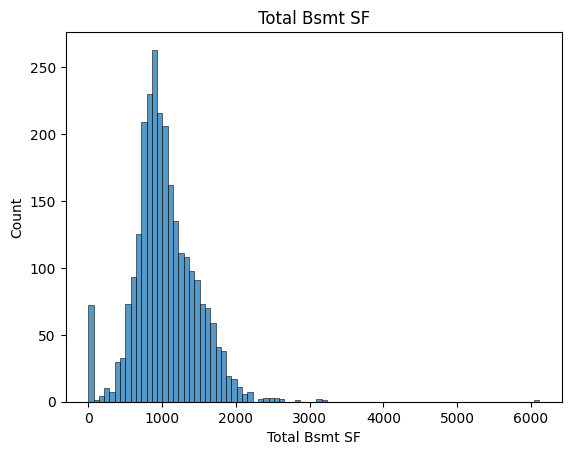

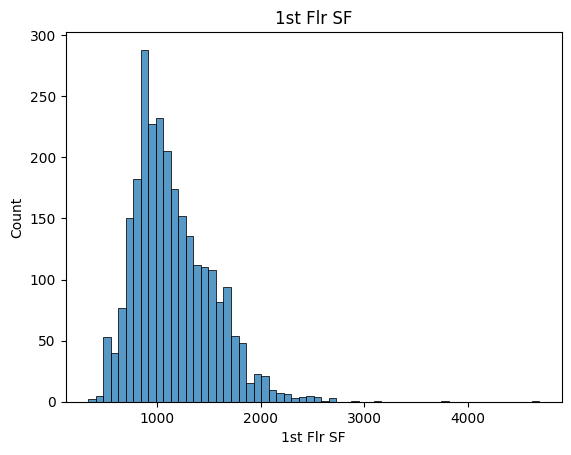

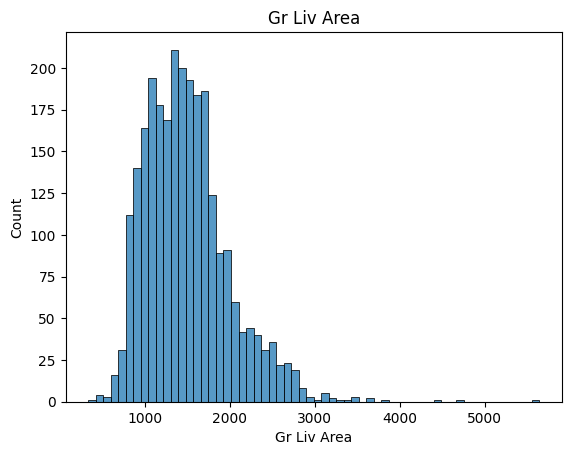

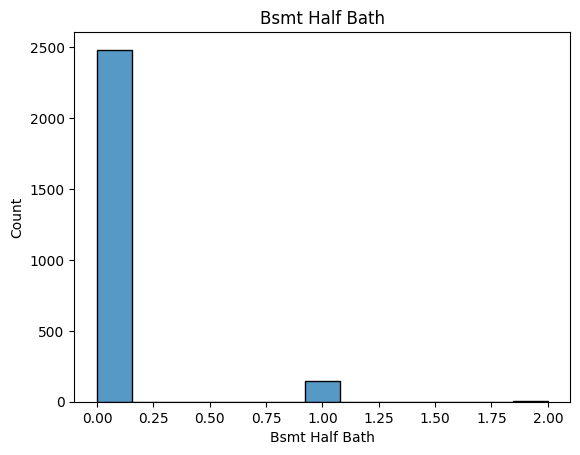

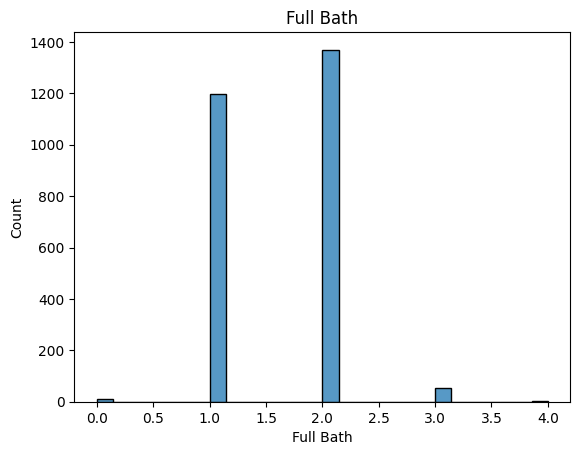

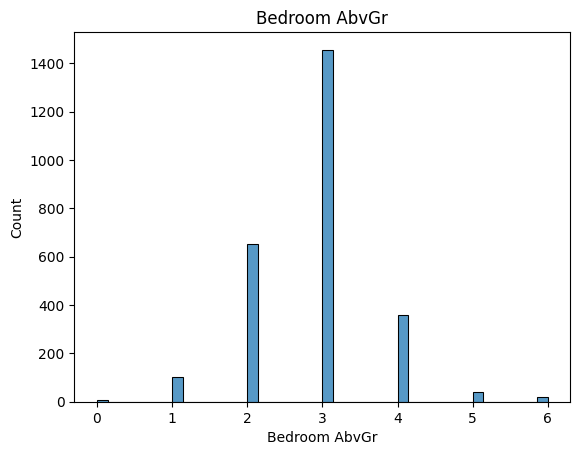

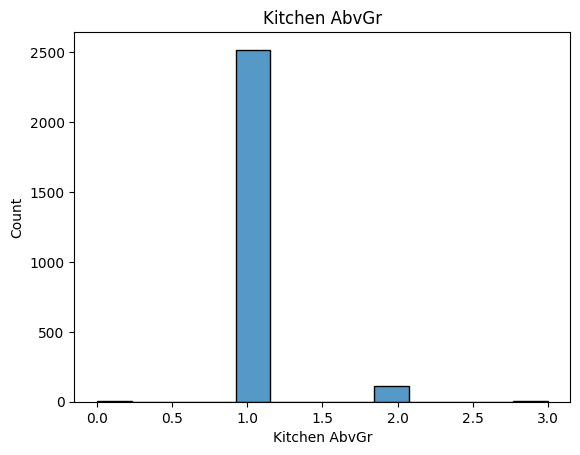

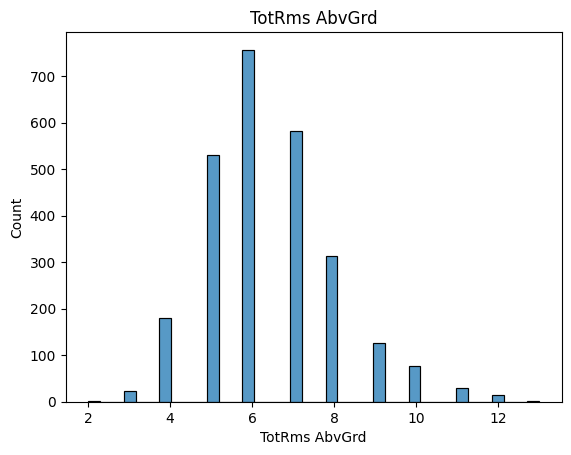

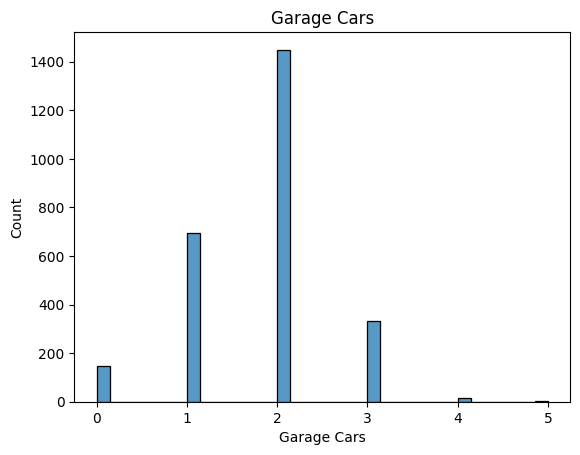

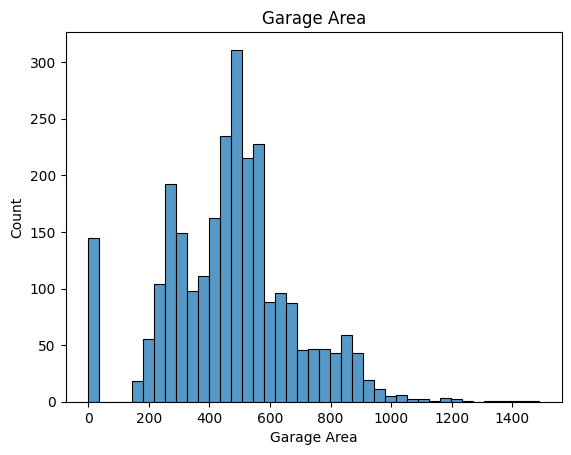

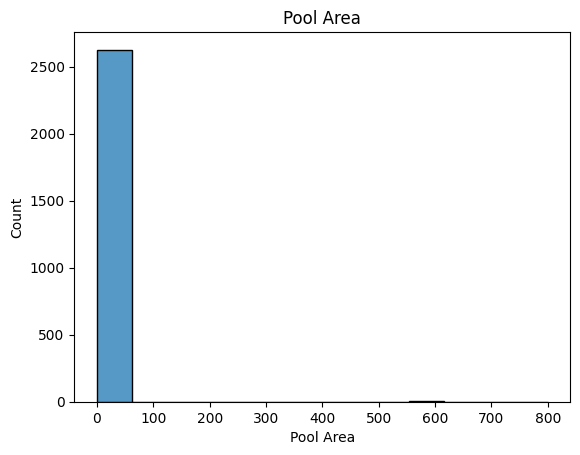

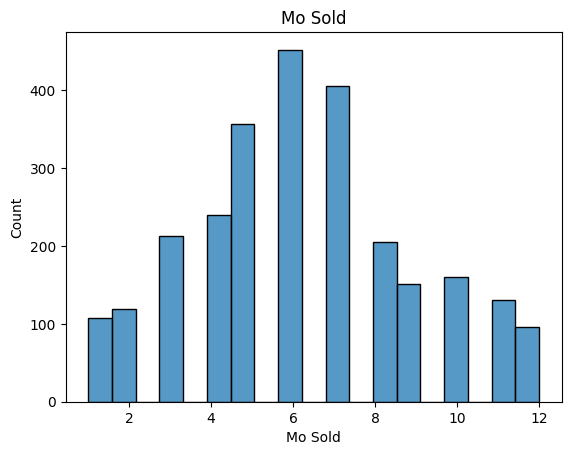

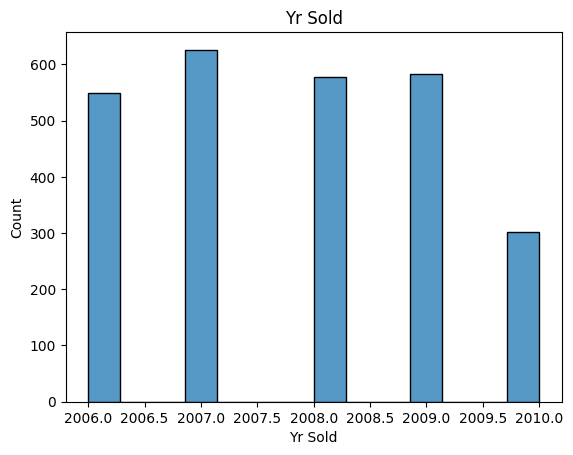

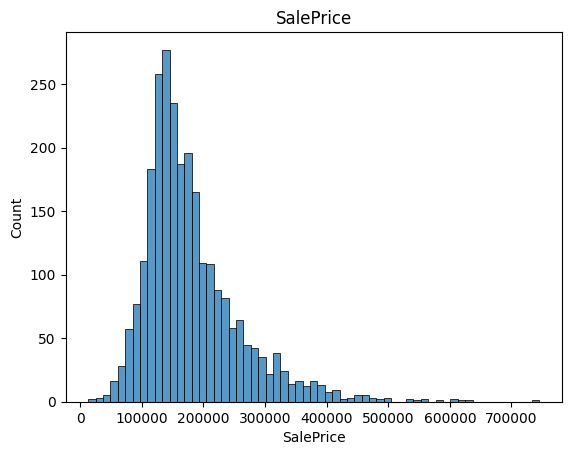

In [ ]:
for element in housing_ns.columns:
  sns.histplot(housing_ns[element])
  plt.title(element)
  plt.show()

In [ ]:
#for element in housing_ns.columns:
#  qqplot(housing_ns[element], line = 's')
#  plt.title(element)
#  plt.show()

In [ ]:
house_ns.columns
chosen = [
    #'PID',
    'MS SubClass',
    'Lot Frontage',
    'Lot Area',
    'Overall Qual',
    'Overall Cond',
    'Year Built',
    'Year Remod/Add',
    'Bsmt Unf SF',
    'Total Bsmt SF',
    '1st Flr SF',
    'Gr Liv Area',
    'Bsmt Half Bath',
    #'Full Bath',
    'Bedroom AbvGr',
    #'Kitchen AbvGr',
    'TotRms AbvGrd',
    'Garage Cars',
    #'Garage Area',
    #'Pool Area',
    'Mo Sold',
    'Yr Sold'
    ]


## Processing


Our analysis used Linear, Ridge, Lasso regression models. In future work additional hyperparameter tuning could benefit our results slightly. More important to our analysis, the bimodal distribution of both cross validated RSMPE histograms and exploratory histograms suggests there are two distinct groups in our data set that could benefit from being modeled separately. I would suggest developing separate models for homes valued above and below ~$350,000.

In [ ]:
y = housing_ns['SalePrice']
X = house_ns[chosen].copy()
X2 = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X2)
linear_model = sm.OLS(y,X2).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     775.1
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:05:39   Log-Likelihood:                -31087.
No. Observations:                2637   AIC:                         6.221e+04
Df Residuals:                    2619   BIC:                         6.232e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.294e+06   9.74e+05      1.

The mean RSMPE is 20.29


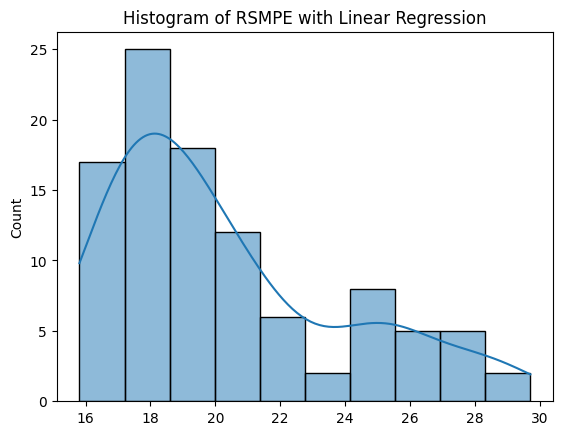

In [ ]:
linear_mean = []
n = 100

for element in range(n):
  xtrain, xtest, ytrain, ytest = train_test_split(X2,y, test_size = .2)
  model = LinearRegression()
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  linear_mean.append((np.sqrt(np.mean(np.square((ytest - ypred) / ytest)))) * 100)

sns.histplot(linear_mean, kde=True, bins = 10)
plt.title('Histogram of RSMPE with Linear Regression')

print(f'The mean RSMPE is {round((sum(linear_mean) / n),2)}')

Text(0.5, 1.0, 'Linear "Sale Price" Model')

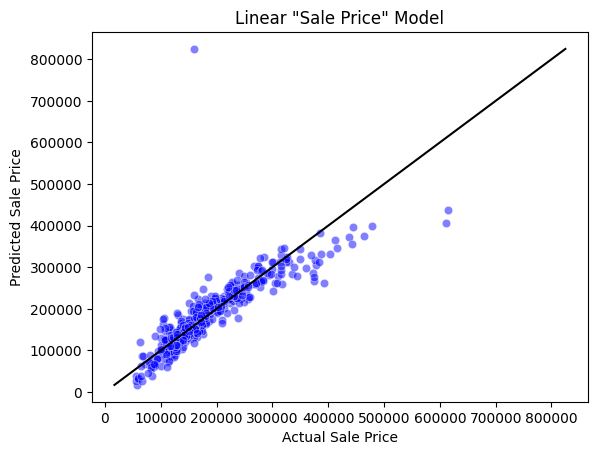

In [ ]:
sns.scatterplot(x = ytest, y = ypred, color="blue", alpha = .5)
plt.plot([min(ypred),max(ypred)],[min(ypred),max(ypred)], color = 'k')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Linear "Sale Price" Model')

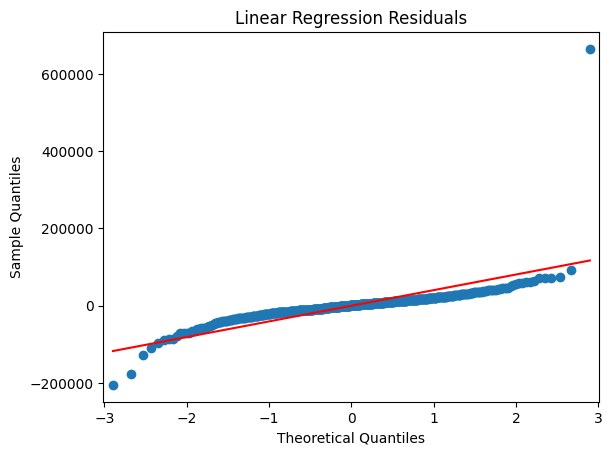

In [ ]:
qqplot(ypred - ytest, line = 's')
plt.title('Linear Regression Residuals')
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X)
X_Scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

The mean RSMPE is 19.3


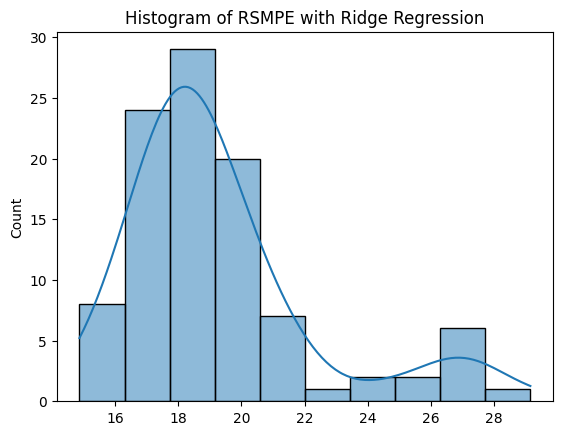

In [ ]:
n = 100
ridge_mean = []

for element in range(n):
  xtrain, xtest, ytrain, ytest = train_test_split(X_Scaled, y, test_size = .2)
  train_ridge = Ridge(alpha = .1)
  train_ridge.fit(xtrain, ytrain)
  ypred = train_ridge.predict(xtest)
  rsmpe = (np.sqrt(np.mean(np.square((ytest - ypred) / ytest)))) * 100
  ridge_mean.append(rsmpe)

sns.histplot(ridge_mean, kde=True, bins = 10)
plt.title('Histogram of RSMPE with Ridge Regression')

print(f'The mean RSMPE is {round((sum(ridge_mean) / n),2)}')

Text(0.5, 1.0, 'Ridge Regression "Sale Price" Model')

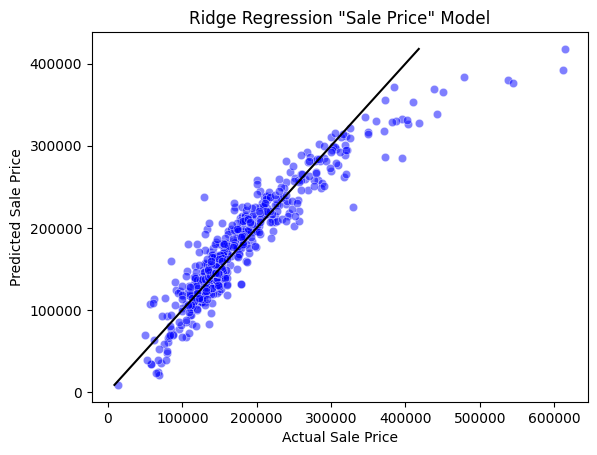

In [ ]:
sns.scatterplot(x = ytest, y = ypred, color="blue", alpha = .5)
plt.plot([min(ypred),max(ypred)],[min(ypred),max(ypred)], color = 'k')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Ridge Regression "Sale Price" Model')

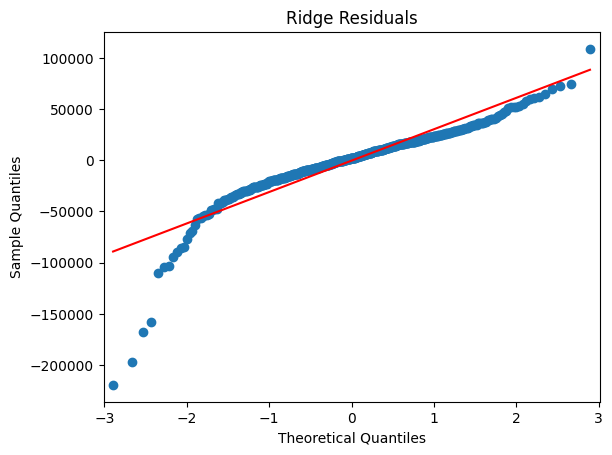

In [ ]:
qqplot(ypred - ytest, line = 's')
plt.title('Ridge Residuals')
plt.show()

The mean RSMPE is 20.36


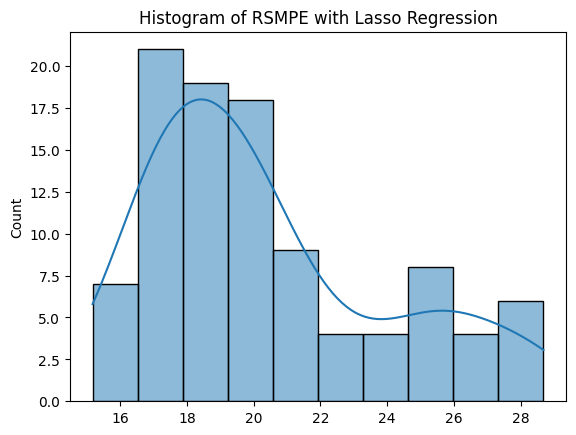

In [ ]:
n = 100
Lasso_mean = []

for element in range(n):
  xtrain, xtest, ytrain, ytest = train_test_split(X_Scaled, y, test_size = .2)
  train_lasso = Lasso(alpha = .1, max_iter=int(1e5))
  train_lasso.fit(xtrain, ytrain)
  ypred = train_lasso.predict(xtest)
  rsmpe = (np.sqrt(np.mean(np.square((ytest - ypred) / ytest)))) * 100
  Lasso_mean.append(rsmpe)

sns.histplot(Lasso_mean, kde=True, bins = 10)
plt.title('Histogram of RSMPE with Lasso Regression')

print(f'The mean RSMPE is {round((sum(Lasso_mean) / n),2)}')

Text(0.5, 1.0, 'Lasso Regression "Sale Price" Model')

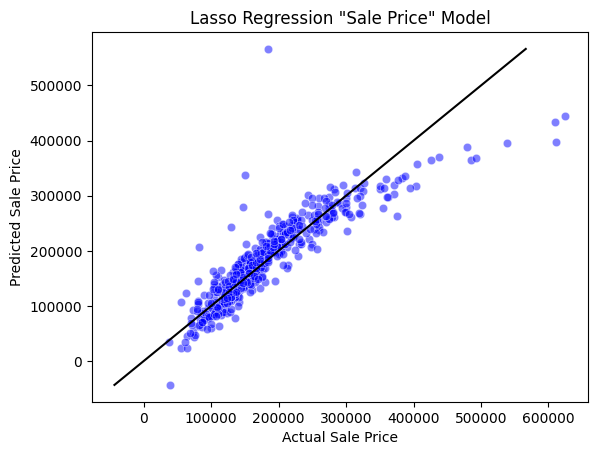

In [ ]:
sns.scatterplot(x = ytest, y = ypred, color="blue", alpha = .5)
plt.plot([min(ypred),max(ypred)],[min(ypred),max(ypred)], color = 'k')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Lasso Regression "Sale Price" Model')

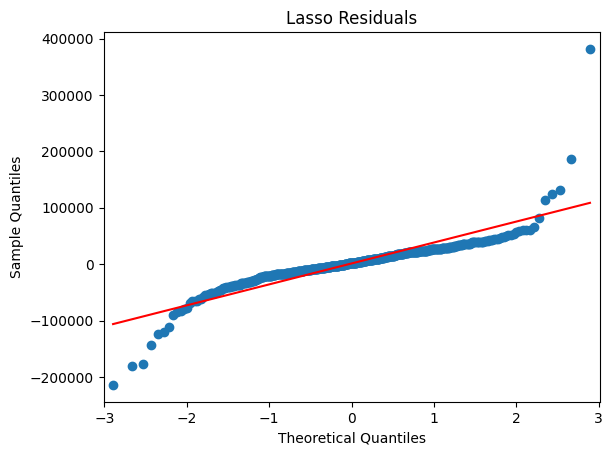

In [ ]:
qqplot(ypred - ytest, line = 's')
plt.title('Lasso Residuals')
plt.show()

## Data Visualization/Communication of Results


Random Forest


Further parameter tuning for our random forest model could lower our RSMPE.

The mean RSMPE is 20.75


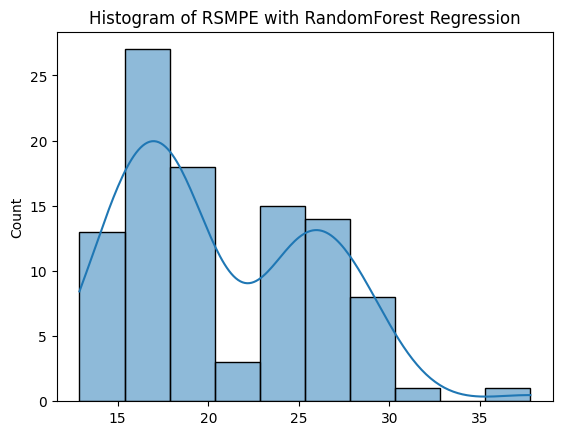

In [ ]:
n = 100
forest_mean = []

for element in range(n):
  xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2)
  forest = RandomForestRegressor( n_estimators = 35)
  forest.fit(xtrain, ytrain)
  ypred = forest.predict(xtest)
  rsmpe = (np.sqrt(np.mean(np.square((ytest - ypred) / ytest)))) * 100
  forest_mean.append(rsmpe)

sns.histplot(forest_mean, kde=True, bins = 10)
plt.title('Histogram of RSMPE with RandomForest Regression')
print(f'The mean RSMPE is {round((sum(forest_mean) / n),2)}')

Text(0.5, 1.0, 'RandomForest Regression "Sale Price" Model')

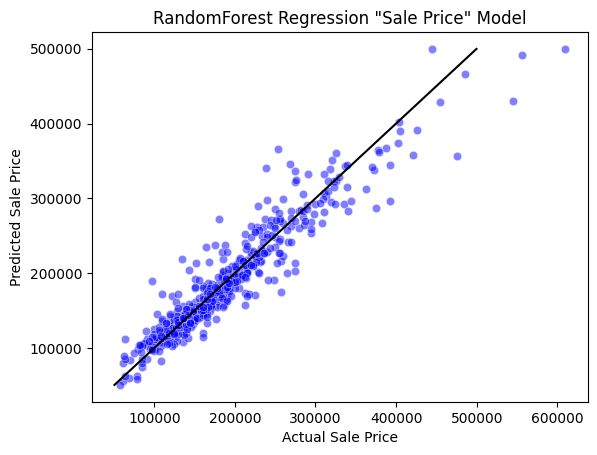

In [ ]:
sns.scatterplot(x = ytest, y = ypred, color="blue", alpha = .5)
plt.plot([min(ypred),max(ypred)],[min(ypred),max(ypred)], color = 'k')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('RandomForest Regression "Sale Price" Model')

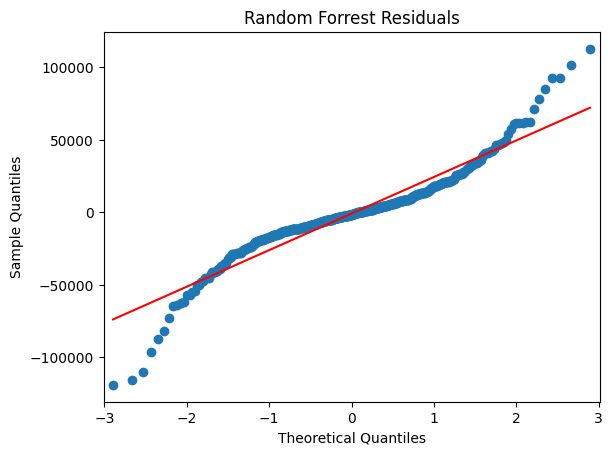

In [ ]:
qqplot(ypred - ytest, line = 's')
plt.title('Random Forrest Residuals')
plt.show()

In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree

In [ ]:
display(
  graphviz.Source(
    tree.export_graphviz(
      forest.estimators_[0],
      feature_names = X.columns,
    )
  )
)

Polynomial Regression

Based on RSMPE, we do not recommend implementing polynomial regression for this dataset.

The mean RSMPE is 93.37... Bad


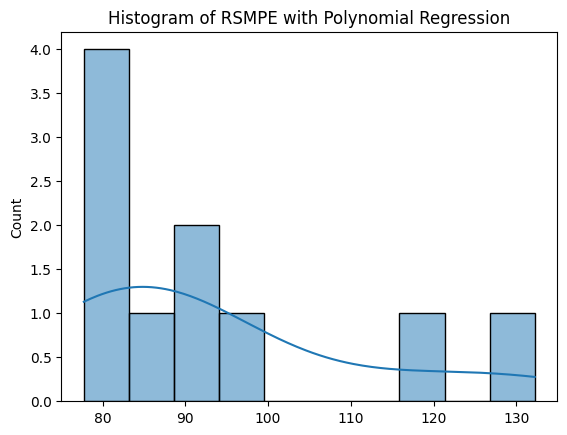

In [ ]:
n = 10 #I only ran this 10 times. 100 Times takes quite a long time.
       #It's not worth the compute power to validate it's... bad.
pr_regression = []

for element in range(n):
  xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2)
  poly = PolynomialFeatures(degree = 3, include_bias = False)
  poly_features = poly.fit_transform(xtrain)
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, ytrain)
  Y_pred = poly_reg_model.predict(poly_features)
  rsmpe = (np.sqrt(np.mean(np.square((ytest - ypred) / ytest)))) * 100
  pr_regression.append(rsmpe)

sns.histplot(pr_regression, kde = True, bins = 10)
plt.title('Histogram of RSMPE with Polynomial Regression')
print(f'The mean RSMPE is {round((sum(pr_regression) / n),2)}... Bad')